# Quantized Discrete Parameter Sampling in AzureML HyperDrive
> Some examples of the parameter expressions that start with "q" when specifying the hyperparameter search space  
- toc: true 
- badges: true
- comments: true
- categories: [azureml, hyperdrive, parameter expression, qnormal, quniform]
- hide: false

## HyperDrive


![hyperdrive](https://raw.githubusercontent.com/pawarbi/blog/master/images/hyperdrive.JPG)

Azure ML offers an automated hyperparameter tuning capability at scale using its 'HyperDrive' package. The key word here is 'at scale'. It works similar to Scikit-Learn's [hyperparameter tuning](https://scikit-learn.org/stable/modules/grid_search.html) but HyperDrive can be run on remote compute clusters with multiple nodes to obtain the optimized parameters faster. If your model pipeline has multiple models with different preprocessing steps, you will ikely end up with thousands of parameter combinations. This can take significant amount of time depending on your model pipeline architecture. With HyperDrive, you can submit the run to a managed remote cluster to run all the experiments and obtain the tuned parameters. Depending on the sampling method used, these runs can also be parallelized to run several experiments concurrently.

You can follow [this example notebook](https://github.com/Azure/MachineLearningNotebooks/blob/master/how-to-use-azureml/ml-frameworks/scikit-learn/train-hyperparameter-tune-deploy-with-sklearn/train-hyperparameter-tune-deploy-with-sklearn.ipynb) to learn more about how to setup the HyperDrive experiment. I will share my more complex example hopefully in the next couple of blogs.

## Parameter Search Space

The parameter search space can be defined using discrete or continuous distributions.

Discrete parameters are integers or strings (e.g. 1, 50, 'liblinear' etc.), while continuous are floats (e.g. 1.2,0.5). You can read more about it [here on MS Docs](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-tune-hyperparameters). One of the ways you can define the discrete hyperparameters is by using the quantized continuous distributions. These are the parameter expressions that start with 'q', e.g. `quniform()`,`qloguniform()`, `qnormal()` and `qlognormal()`. Note that the 'q' parameters cannot be used for with `GridParameterSampling()` and `BayesianParameterSampling()` only supports `quniform()`.

Microsoft documentation doesn't give examples of the search space these 'q' parameters create, so I thought I would provide some examples. 

#### 1. quniform

`quniform(low, high, q)` creates uniform distriution between low and high values, separated by spacing q. For example, to create a discrete distribution of values between (10,30) that are 2 values values apart you would define : 

In [38]:
from azureml.train.hyperdrive import normal, uniform, choice, quniform, qloguniform, qnormal, qlognormal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

{
    
    "param" : quniform(10, 30, 2)
    
}

{'param': ['quniform', [10, 30, 2]]}

This is what the search space will look like:

In [42]:
#with q = 2
param = np.sort(np.unique((np.round(np.random.uniform(low = 10, high = 30, size=10)/2)*2)))

param

array([12., 18., 22., 28.])

[12. 15. 18. 24. 27. 30.]


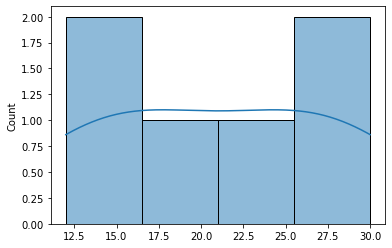

In [151]:
#with q = 3
param = np.sort(np.unique(np.round(np.random.uniform(low = 10, high = 30, size=10)/3)*3))

print(param)
sns.histplot(param, kde=True);

As you can see above, qith `q=2` the values are spaced apart by 2 values and with `q=3`, the values are 3 units apart. Note that the values are randomly distributed so you may not see all the values between the specified `low` and `high`. You could specify the same search space by using `choice(12, 15, 17,27)`. But if the search space is large, it's easier to use the quantized version. 

#### 2. qloguniform

Defined as :

In [73]:
{
    
    "param" : qloguniform(0.01, 5, 3)
    
}

{'param': ['qloguniform', [0.01, 5, 3]]}

[  1.   2.   3.   4.   5.   7.   9.  10.  11.  17.  18.  19.  37.  47.
  50.  57.  59. 102. 141.]


<AxesSubplot:ylabel='Count'>

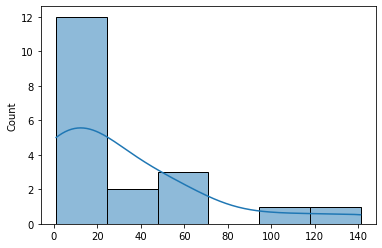

In [160]:
#with q = 3
param = np.sort(np.unique(np.round(np.exp(np.random.uniform(0.01,5,30)))/3)*3)

print(param)
sns.histplot(param, kde=True)

#### 3.qnormal

Values are normally distributed with specified mean and standard deviation. 
Defined as:

In [95]:
{
    
    "param" : qnormal(300,50, 5)
    
}

{'param': ['qnormal', [300, 50, 5]]}

[196. 199. 200. 236. 241. 255. 257. 258. 260. 261. 274. 277. 278. 280.
 284. 285. 286. 287. 291. 296. 298. 300. 302. 303. 305. 306. 307. 310.
 312. 314. 317. 319. 323. 324. 331. 338. 341. 345. 350. 372. 395.]


<AxesSubplot:ylabel='Count'>

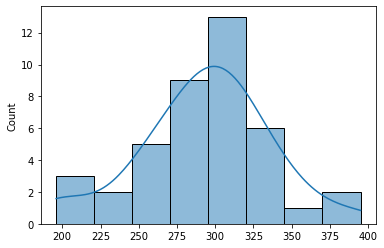

In [148]:
#with mean = 300, std = 50, q = 5
param = np.sort(np.unique(np.round((np.random.normal(300,50,50)))/5)*5)

print(param)


sns.histplot(param, kde=True)

This would be a good choice for, say `n_estimators()` in tree-based algorithms. You can always adjust the q parameter to define how close the values can be.

#### 4. qlognormal

Values are lognormally distributed with the specified mean and standard deviation. 

In [114]:
{
    
    "param" : qlognormal(10,0.5, 2)
    
}

{'param': ['qlognormal', [10, 2, 2]]}

[ 7426.  9054.  9668. 10800. 10816. 10886. 12758. 14232. 14346. 14838.
 15376. 17612. 18320. 19152. 20512. 22676. 25370. 26078. 26398. 32758.
 37050. 41412. 43732. 54636. 58332.]


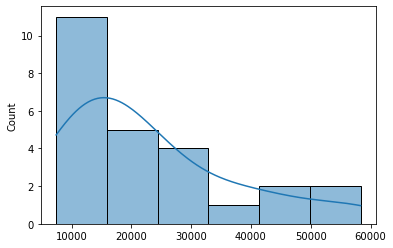

In [155]:
#with mean = 300, std = 50, q = 2
param = np.sort(np.unique(np.round(np.exp(np.random.normal(10,0.5,25))/2)*2))

print(param)

sns.histplot(param, kde=True);

This would be helpful for creating non-uniform distributin of the parameters that are right-skewed

### References

1. https://docs.microsoft.com/en-us/azure/machine-learning/how-to-tune-hyperparameters
2. https://docs.microsoft.com/en-us/python/api/azureml-train-core/azureml.train.hyperdrive.parameter_expressions?view=azure-ml-py#azureml_train_hyperdrive_parameter_expressions_uniform

3. https://docs.microsoft.com/en-us/python/api/azureml-train-core/azureml.train.hyperdrive.bayesianparametersampling?preserve-view=true&view=azure-ml-py